In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## CNN Malignancy:

In [2]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/CNN_mal_max_scores.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,High Radiologist Agreement
1,0.052552,Low Radiologist Agreement
2,0.080854,Low Radiologist Agreement
3,0.013781,Low Radiologist Agreement
4,0.012647,Low Radiologist Agreement
...,...,...
1327,0.080852,Low Radiologist Agreement
1328,0.000155,High Radiologist Agreement
1329,0.142658,High Radiologist Agreement
1330,0.428065,Low Radiologist Agreement


In [3]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,99
1,High Radiologist Agreement,332
2,Low Radiologist Agreement,747
3,No Radiologist Agreement,154


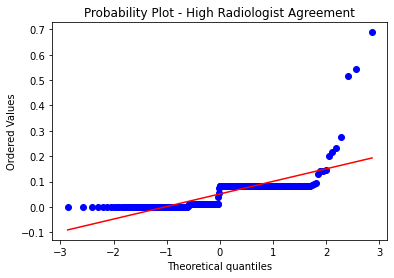

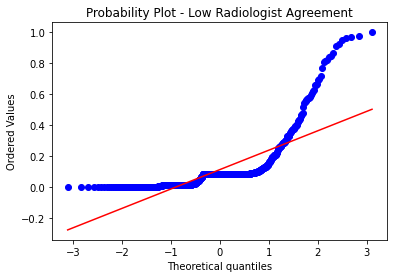

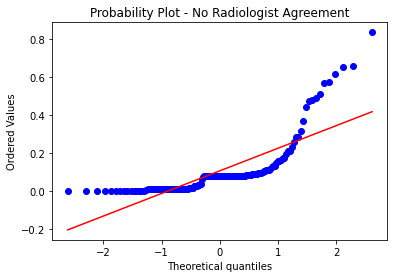

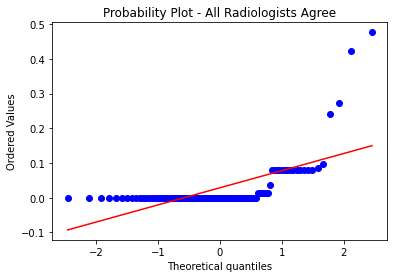

In [4]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [5]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Agreement').std().max() / score_df.groupby('Agreement').std().min()
ratio

Score    2.388213
dtype: float64

In [6]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1.283107,3,0.427702,22.800384,0.0,3.125948
Within Groups,24.911362,1328,0.018759,,,
Total,26.194469,1331,0.01968,,,


In [7]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 22.8003842063873  and p value is: 2.142730437526552e-14
Null Hypothesis is rejected.


In [8]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Agreement'], alpha=0.05)
print(m_comp)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
    All Radiologists Agree High Radiologist Agreement   0.0223 0.4866  -0.018 0.0626  False
    All Radiologists Agree  Low Radiologist Agreement   0.0833  0.001  0.0456  0.121   True
    All Radiologists Agree   No Radiologist Agreement   0.0784  0.001   0.033 0.1238   True
High Radiologist Agreement  Low Radiologist Agreement    0.061  0.001  0.0378 0.0842   True
High Radiologist Agreement   No Radiologist Agreement   0.0561  0.001  0.0217 0.0904   True
 Low Radiologist Agreement   No Radiologist Agreement  -0.0049    0.9 -0.0361 0.0263  False
-------------------------------------------------------------------------------------------


## CNN Mal By label: 

         Score  Spiculation
0     0.000000            0
1     0.052552            3
2     0.080854            3
3     0.013781            3
4     0.012647            3
...        ...          ...
1327  0.080852            3
1328  0.000155            2
1329  0.142658            2
1330  0.428065            3
1331  0.080851            2

[1332 rows x 2 columns]
   Spiculation  Score
0            0    171
1            1     79
2            2    181
3            3    901


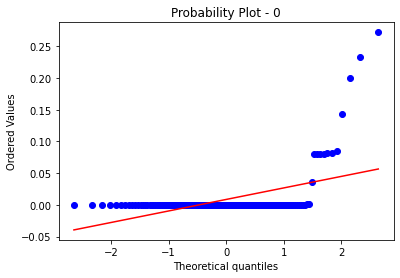

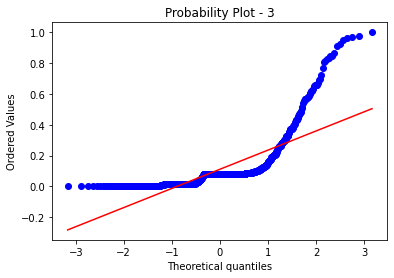

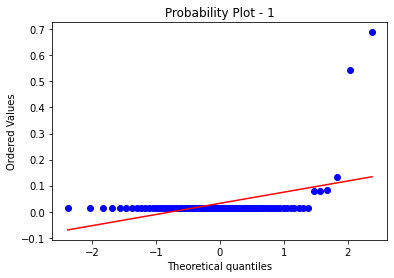

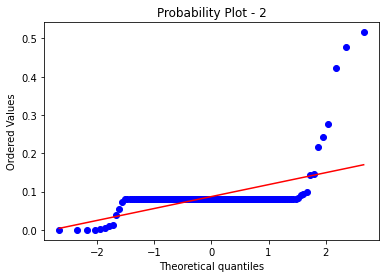

Score    4.380931
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1.804372,3,0.601457,32.748344,0.0,3.125948
Within Groups,24.390097,1328,0.018366,,,
Total,26.194469,1331,0.01968,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 32.74834432362351  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 32.74834432362351  and critical value is: 3.125948246710743
Null Hypothesis is rejected.


In [9]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/CNN_mal_max_scores.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

In [10]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0235 0.5693 -0.0239 0.0709  False
     0      2   0.0786  0.001  0.0415 0.1158   True
     0      3   0.1026  0.001  0.0735 0.1317   True
     1      2   0.0551 0.0139  0.0081 0.1021   True
     1      3   0.0791  0.001  0.0382   0.12   True
     2      3    0.024 0.1317 -0.0044 0.0524  False
---------------------------------------------------


## CNN Spic:

In [2]:
# read original dataset
#score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/CNN_spic_max_scores.csv')
score_df = pd.read_csv('/Users/amalalmansour/Downloads/max_scores-3.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,All Radiologists Agree
1,0.030953,Low Radiologist Agreement
2,0.621245,Low Radiologist Agreement
3,0.024759,High Radiologist Agreement
4,0.024795,All Radiologists Agree
...,...,...
1327,0.000154,High Radiologist Agreement
1328,0.000000,High Radiologist Agreement
1329,0.000000,Low Radiologist Agreement
1330,0.000000,High Radiologist Agreement


In [3]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,270
1,High Radiologist Agreement,457
2,Low Radiologist Agreement,522
3,No Radiologist Agreement,83


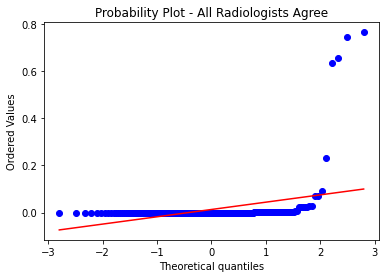

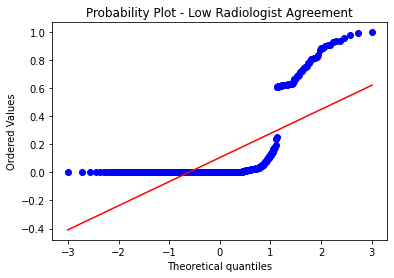

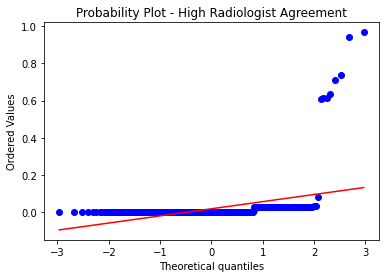

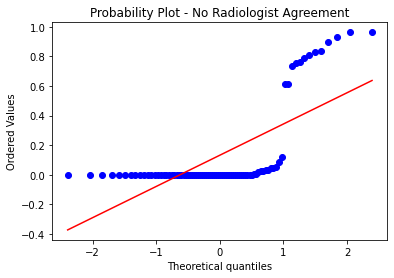

In [4]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [5]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,2.972661,3,0.990887,29.146509,0.0,3.125948
Within Groups,45.147699,1328,0.033997,,,
Total,48.12036,1331,0.036154,,,


In [6]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 29.146508628488647  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 29.146508628488647  and critical value is: 3.125948246710743
Null Hypothesis is rejected.


In [7]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Agreement'], alpha=0.05)
print(m_comp)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
    All Radiologists Agree High Radiologist Agreement   0.0048    0.9 -0.0316 0.0412  False
    All Radiologists Agree  Low Radiologist Agreement   0.0934  0.001  0.0579  0.129   True
    All Radiologists Agree   No Radiologist Agreement   0.1198  0.001  0.0603 0.1793   True
High Radiologist Agreement  Low Radiologist Agreement   0.0886  0.001  0.0582  0.119   True
High Radiologist Agreement   No Radiologist Agreement    0.115  0.001  0.0584 0.1716   True
 Low Radiologist Agreement   No Radiologist Agreement   0.0264 0.6058 -0.0297 0.0824  False
-------------------------------------------------------------------------------------------


## CNN Spic By labels:

         Score  Spiculation
0     0.000000            0
1     0.030953            2
2     0.621245            2
3     0.024759            1
4     0.024795            1
...        ...          ...
1327  0.000154            0
1328  0.000000            0
1329  0.000000            2
1330  0.000000            1
1331  0.000009            2

[1332 rows x 2 columns]
   Spiculation  Score
0            0    615
1            1    112
2            2    605


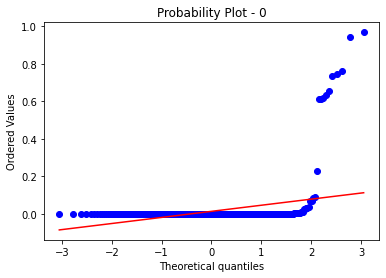

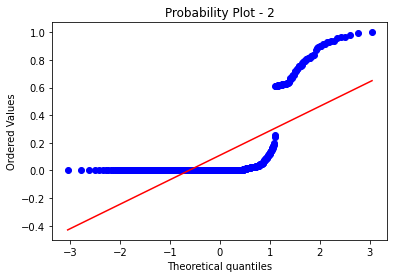

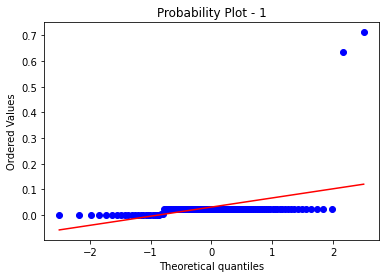

Score    2.886419
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,2.949853,2,1.474926,43.39507,0.0,3.699138
Within Groups,45.170507,1329,0.033988,,,
Total,48.12036,1331,0.036154,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 43.3950697544762  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 43.3950697544762  and critical value is: 3.6991375784749216
Null Hypothesis is rejected.


In [9]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Downloads/max_scores-3.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

In [18]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0098 0.6471 -0.0166 0.0362  False
     0      2   0.0401  0.001  0.0254 0.0548   True
     1      2   0.0303 0.0197  0.0039 0.0568   True
---------------------------------------------------


# SCNN Mal:

In [19]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/SCNN_mal_max_scores.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,No Radiologist Agreement
1,0.249640,Low Radiologist Agreement
2,0.000574,Low Radiologist Agreement
3,0.235478,Low Radiologist Agreement
4,0.225730,Low Radiologist Agreement
...,...,...
1327,0.000432,Low Radiologist Agreement
1328,0.095126,High Radiologist Agreement
1329,0.000619,High Radiologist Agreement
1330,0.300162,Low Radiologist Agreement


In [20]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,99
1,High Radiologist Agreement,332
2,Low Radiologist Agreement,747
3,No Radiologist Agreement,154


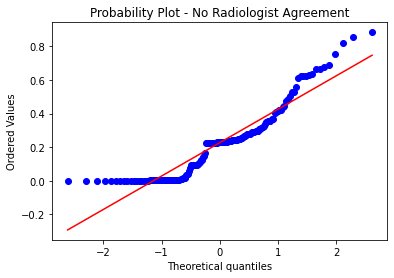

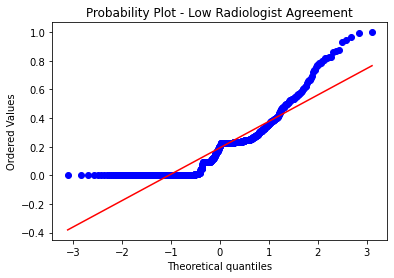

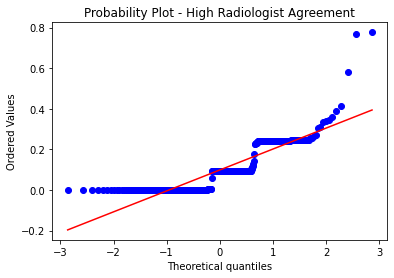

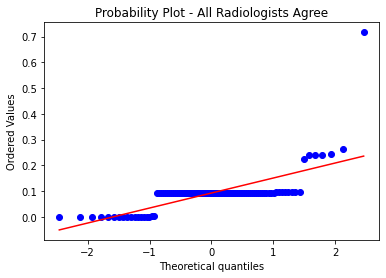

In [21]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [22]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,3.120522,3,1.040174,33.209711,0.0,3.125948
Within Groups,41.594793,1328,0.031321,,,
Total,44.715315,1331,0.033595,,,


In [23]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 33.20971102220835  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 33.20971102220835  and critical value is: 3.125948246710743
Null Hypothesis is rejected.


In [24]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Agreement'], alpha=0.05)
print(m_comp)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
    All Radiologists Agree High Radiologist Agreement   0.0063    0.9 -0.0458 0.0584  False
    All Radiologists Agree  Low Radiologist Agreement   0.0997  0.001   0.051 0.1483   True
    All Radiologists Agree   No Radiologist Agreement   0.1347  0.001   0.076 0.1933   True
High Radiologist Agreement  Low Radiologist Agreement   0.0934  0.001  0.0633 0.1234   True
High Radiologist Agreement   No Radiologist Agreement   0.1284  0.001   0.084 0.1727   True
 Low Radiologist Agreement   No Radiologist Agreement    0.035 0.1146 -0.0053 0.0753  False
-------------------------------------------------------------------------------------------


## SCNN Mal By label: 

         Score  Spiculation
0     0.000000            3
1     0.249640            3
2     0.000574            3
3     0.235478            3
4     0.225730            3
...        ...          ...
1327  0.000432            3
1328  0.095126            2
1329  0.000619            2
1330  0.300162            3
1331  0.001335            2

[1332 rows x 2 columns]
   Spiculation  Score
0            0    171
1            1     79
2            2    181
3            3    901


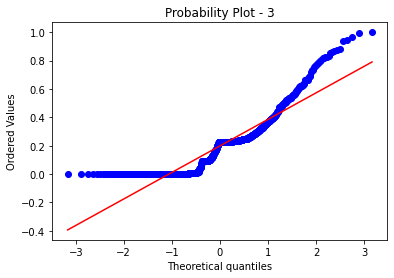

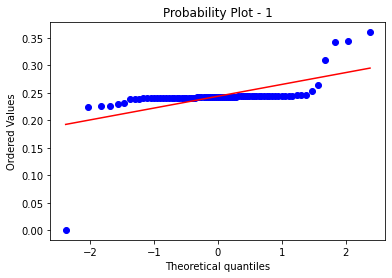

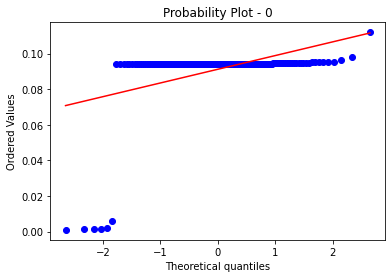

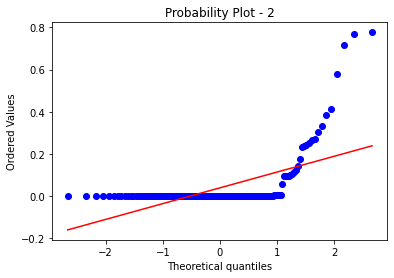

Score    11.787705
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,5.26923,3,1.75641,59.131663,0.0,3.125948
Within Groups,39.446085,1328,0.029703,,,
Total,44.715315,1331,0.033595,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 59.131663281159454  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 59.131663281159454  and critical value is: 3.125948246710743
Null Hypothesis is rejected.


In [25]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/SCNN_mal_max_scores.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

In [26]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1527  0.001  0.0924   0.213   True
     0      2  -0.0517 0.0258 -0.0989 -0.0044   True
     0      3   0.1071  0.001  0.0701  0.1441   True
     1      2  -0.2044  0.001 -0.2641 -0.1446   True
     1      3  -0.0456 0.1091 -0.0976  0.0064  False
     2      3   0.1587  0.001  0.1226  0.1948   True
----------------------------------------------------


# SCNN Spic:

In [2]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Downloads/SCNN_spic_max_scores.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,High Radiologist Agreement
1,0.374469,Low Radiologist Agreement
2,0.000017,Low Radiologist Agreement
3,0.031189,High Radiologist Agreement
4,0.039609,All Radiologists Agree
...,...,...
1327,0.000215,High Radiologist Agreement
1328,0.000032,High Radiologist Agreement
1329,0.000161,Low Radiologist Agreement
1330,0.000039,High Radiologist Agreement


In [3]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,270
1,High Radiologist Agreement,457
2,Low Radiologist Agreement,522
3,No Radiologist Agreement,83


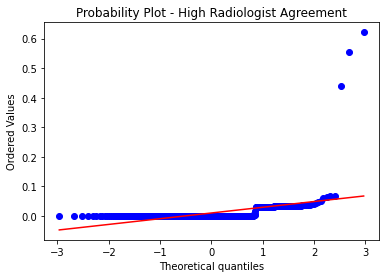

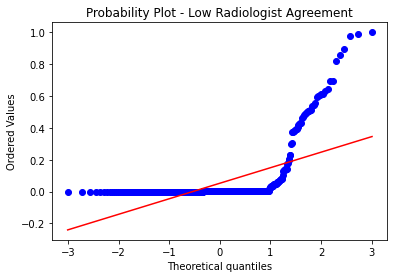

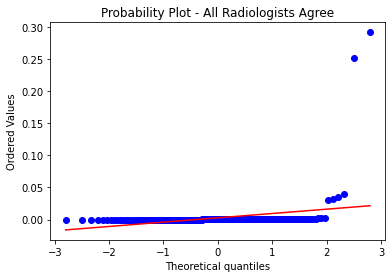

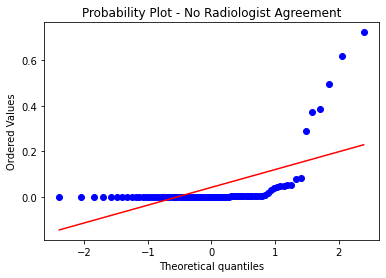

In [4]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [5]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.633771,3,0.211257,17.84573,0.0,3.125948
Within Groups,15.720815,1328,0.011838,,,
Total,16.354586,1331,0.012287,,,


In [6]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 17.845730463162248  and p value is: 2.336597582086597e-11
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 17.845730463162248  and critical value is: 3.125948246710743
Null Hypothesis is rejected.


In [7]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Agreement'], alpha=0.05)
print(m_comp)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
    All Radiologists Agree High Radiologist Agreement   0.0076 0.7773 -0.0139  0.029  False
    All Radiologists Agree  Low Radiologist Agreement   0.0494  0.001  0.0284 0.0704   True
    All Radiologists Agree   No Radiologist Agreement   0.0385 0.0249  0.0034 0.0737   True
High Radiologist Agreement  Low Radiologist Agreement   0.0419  0.001  0.0239 0.0598   True
High Radiologist Agreement   No Radiologist Agreement    0.031 0.0802 -0.0024 0.0644  False
 Low Radiologist Agreement   No Radiologist Agreement  -0.0109 0.8103  -0.044 0.0222  False
-------------------------------------------------------------------------------------------


## SCNN Spic By Labels:

         Score  Spiculation
0     0.000000            0
1     0.374469            5
2     0.000017            5
3     0.031189            1
4     0.039609            1
...        ...          ...
1327  0.000215            0
1328  0.000032            0
1329  0.000161            5
1330  0.000039            1
1331  0.000343            5

[1332 rows x 2 columns]
   Spiculation  Score
0            0    615
1            1    112
2            5    605


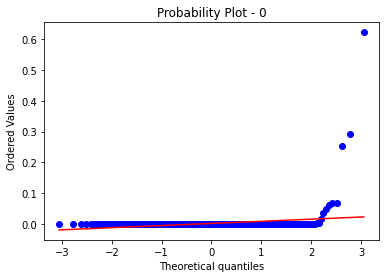

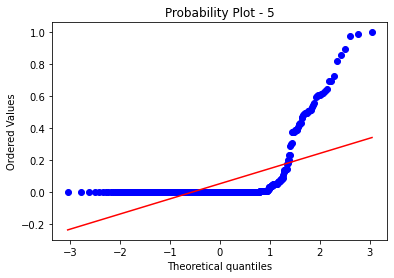

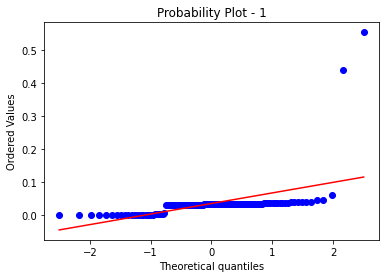

Score    5.206722
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.710741,2,0.35537,30.189977,0.0,3.699138
Within Groups,15.643846,1329,0.011771,,,
Total,16.354586,1331,0.012287,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 30.18997666829834  and p value is: 1.5054624213917123e-13
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 30.18997666829834  and critical value is: 3.6991375784749216
Null Hypothesis is rejected.


In [8]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Downloads/SCNN_spic_max_scores.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

In [9]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0317 0.0126  0.0055 0.0578   True
     0      5   0.0481  0.001  0.0335 0.0626   True
     1      5   0.0164 0.3078 -0.0098 0.0426  False
---------------------------------------------------


# Deasigned Features Spic:

In [35]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/DF_spic_max_scores.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,Low Radiologist Agreement
1,0.394307,All Radiologists Agree
2,0.495638,Low Radiologist Agreement
3,0.337506,Low Radiologist Agreement
4,0.338533,All Radiologists Agree
...,...,...
1327,0.326365,High Radiologist Agreement
1328,0.562486,Low Radiologist Agreement
1329,0.447932,No Radiologist Agreement
1330,0.495461,No Radiologist Agreement


In [36]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,270
1,High Radiologist Agreement,457
2,Low Radiologist Agreement,522
3,No Radiologist Agreement,83


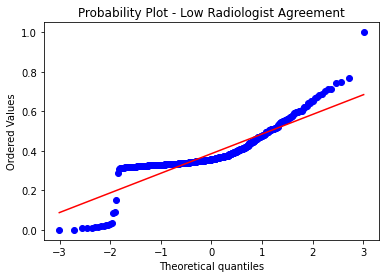

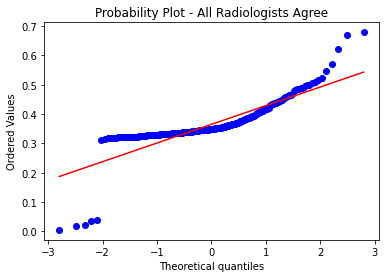

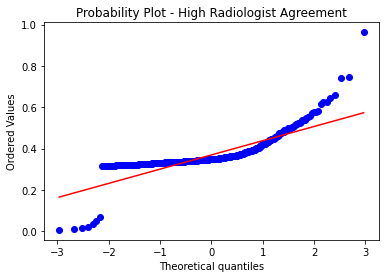

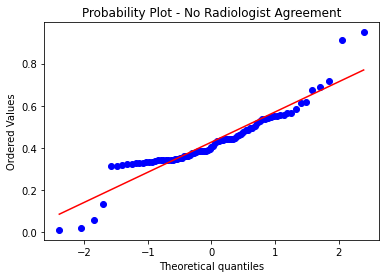

In [37]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [38]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.317486,3,0.105829,11.161134,0.0,3.125948
Within Groups,12.591949,1328,0.009482,,,
Total,12.909435,1331,0.009699,,,


In [39]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 11.161134379967944  and p value is: 3.0969166842087503e-07
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 11.161134379967944  and critical value is: 3.125948246710743
Null Hypothesis is rejected.


In [40]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Agreement'], alpha=0.05)
print(m_comp)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
    All Radiologists Agree High Radiologist Agreement    0.004    0.9 -0.0152 0.0232  False
    All Radiologists Agree  Low Radiologist Agreement   0.0208 0.0232   0.002 0.0396   True
    All Radiologists Agree   No Radiologist Agreement   0.0625  0.001  0.0311  0.094   True
High Radiologist Agreement  Low Radiologist Agreement   0.0168 0.0364  0.0007 0.0328   True
High Radiologist Agreement   No Radiologist Agreement   0.0585  0.001  0.0286 0.0884   True
 Low Radiologist Agreement   No Radiologist Agreement   0.0417 0.0017  0.0121 0.0713   True
-------------------------------------------------------------------------------------------


## Designed Features Spic By label: 

         Score  Spiculation
0     0.000000            2
1     0.394307            0
2     0.495638            2
3     0.337506            2
4     0.338533            0
...        ...          ...
1327  0.326365            0
1328  0.562486            2
1329  0.447932            2
1330  0.495461            2
1331  0.335376            0

[1332 rows x 2 columns]
   Spiculation  Score
0            0    615
1            1    112
2            2    605


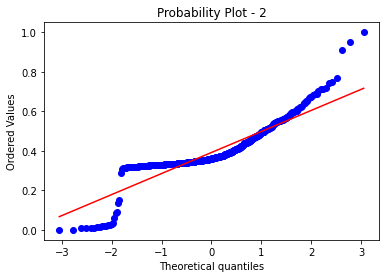

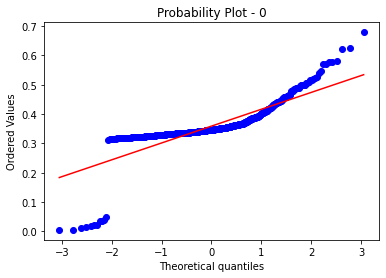

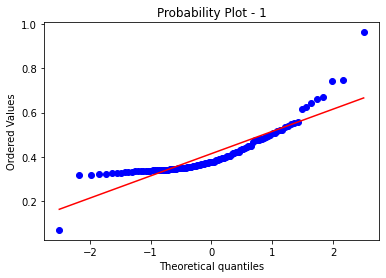

Score    1.702947
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.488878,2,0.244439,26.155007,0.0,3.699138
Within Groups,12.420557,1329,0.009346,,,
Total,12.909435,1331,0.009699,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 26.15500727097696  and p value is: 7.225553488865444e-12
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 26.15500727097696  and critical value is: 3.6991375784749216
Null Hypothesis is rejected.


In [41]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/DF_spic_max_scores.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

In [42]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0562  0.001  0.0329  0.0795   True
     0      2   0.0326  0.001  0.0197  0.0456   True
     1      2  -0.0235 0.0477 -0.0469 -0.0002   True
----------------------------------------------------


# Deasigned Features Mal:

In [43]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/DF_mal_max_scores.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,Low Radiologist Agreement
1,0.796948,No Radiologist Agreement
2,0.746083,Low Radiologist Agreement
3,0.645305,Low Radiologist Agreement
4,0.602024,High Radiologist Agreement
...,...,...
1327,0.593644,Low Radiologist Agreement
1328,0.722667,High Radiologist Agreement
1329,0.962471,High Radiologist Agreement
1330,0.827742,Low Radiologist Agreement


In [44]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,99
1,High Radiologist Agreement,332
2,Low Radiologist Agreement,747
3,No Radiologist Agreement,154


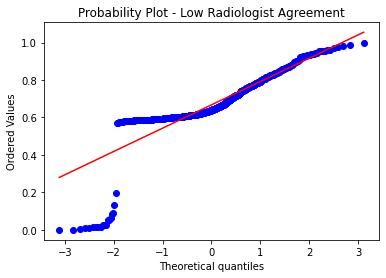

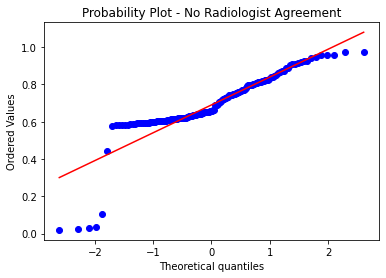

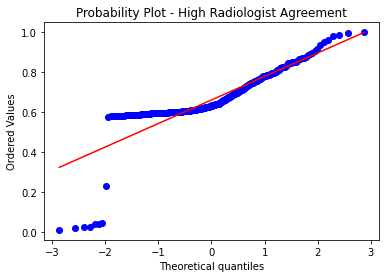

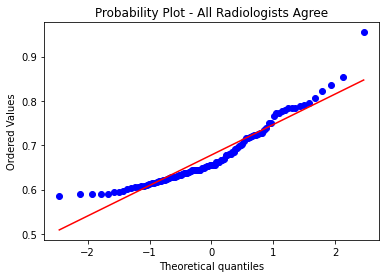

In [45]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [46]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.09872,3,0.032907,1.728032,0.159357,3.125948
Within Groups,25.288838,1328,0.019043,,,
Total,25.387558,1331,0.019074,,,


In [47]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.728031679345344  and p value is: 0.1593574242244662
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.728031679345344  and critical value is: 3.125948246710743
Failed to reject the null hypothesis.


In [48]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Agreement'], alpha=0.05)
print(m_comp)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
    All Radiologists Agree High Radiologist Agreement  -0.0171 0.6767 -0.0578 0.0235  False
    All Radiologists Agree  Low Radiologist Agreement  -0.0106 0.8819 -0.0486 0.0274  False
    All Radiologists Agree   No Radiologist Agreement   0.0118    0.9 -0.0339 0.0576  False
High Radiologist Agreement  Low Radiologist Agreement   0.0065 0.8827 -0.0169 0.0299  False
High Radiologist Agreement   No Radiologist Agreement    0.029  0.137 -0.0056 0.0636  False
 Low Radiologist Agreement   No Radiologist Agreement   0.0224 0.2563  -0.009 0.0539  False
-------------------------------------------------------------------------------------------


## Designed Features Mal By labels: 

         Score  Spiculation
0     0.000000            3
1     0.796948            3
2     0.746083            3
3     0.645305            3
4     0.602024            0
...        ...          ...
1327  0.593644            3
1328  0.722667            1
1329  0.962471            1
1330  0.827742            3
1331  0.629116            0

[1332 rows x 2 columns]
   Spiculation  Score
0            0    171
1            1     79
2            2    181
3            3    901


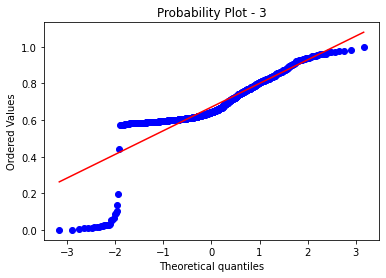

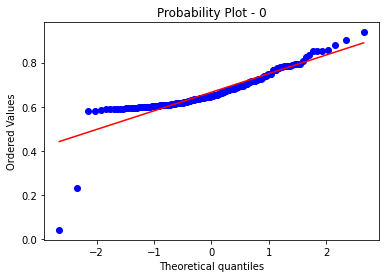

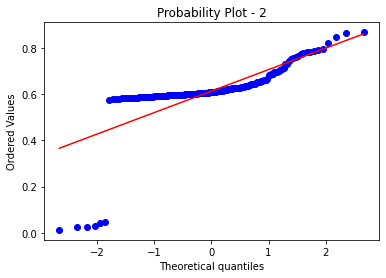

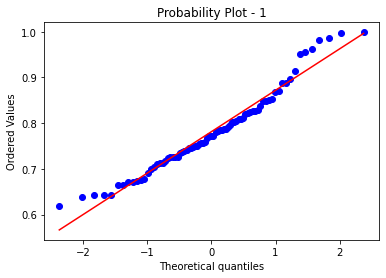

Score    1.605921
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1.56997,3,0.523323,29.179006,0.0,3.125948
Within Groups,23.817587,1328,0.017935,,,
Total,25.387558,1331,0.019074,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 29.179006305470338  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 29.179006305470338  and critical value is: 3.125948246710743
Null Hypothesis is rejected.


In [49]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/DF_mal_max_scores.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

In [50]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1156  0.001  0.0688  0.1625   True
     0      2  -0.0526 0.0014 -0.0894 -0.0159   True
     0      3   0.0055    0.9 -0.0232  0.0342  False
     1      2  -0.1683  0.001 -0.2147 -0.1218   True
     1      3  -0.1101  0.001 -0.1506 -0.0697   True
     2      3   0.0582  0.001  0.0301  0.0862   True
----------------------------------------------------


## VAE - Spic

In [3]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Downloads/max_scores-2.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,All Radiologists Agree
1,0.161732,Low Radiologist Agreement
2,0.429290,Low Radiologist Agreement
3,0.228904,High Radiologist Agreement
4,0.769073,All Radiologists Agree
...,...,...
1327,0.534479,High Radiologist Agreement
1328,0.458102,High Radiologist Agreement
1329,0.264794,Low Radiologist Agreement
1330,0.428968,High Radiologist Agreement


In [4]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,270
1,High Radiologist Agreement,457
2,Low Radiologist Agreement,522
3,No Radiologist Agreement,83


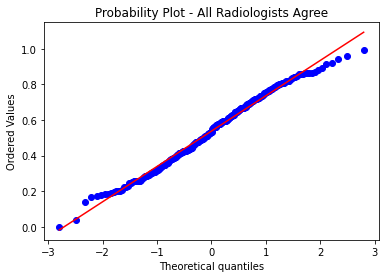

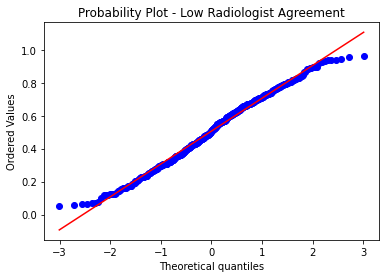

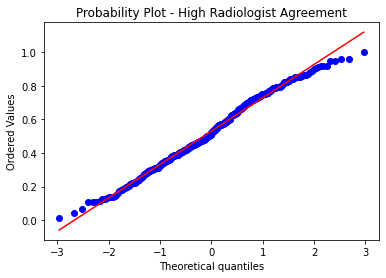

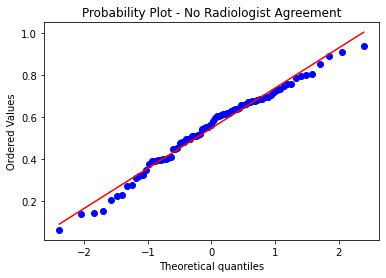

In [5]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [6]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.267333,3,0.089111,2.264461,0.079299,3.125948
Within Groups,52.259442,1328,0.039352,,,
Total,52.526775,1331,0.039464,,,


In [7]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 2.264461123684125  and p value is: 0.07929898022549031
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2.264461123684125  and critical value is: 3.125948246710743
Failed to reject the null hypothesis.


## Spic - Labels 

         Score  Spiculation
0     0.000000            0
1     0.309342            2
2     0.533921            2
3     0.253734            1
4     0.900379            1
...        ...          ...
1327  0.477000            0
1328  0.608527            0
1329  0.258840            2
1330  0.599331            1
1331  0.553599            2

[1332 rows x 2 columns]
   Spiculation  Score
0            0    615
1            1    112
2            2    605


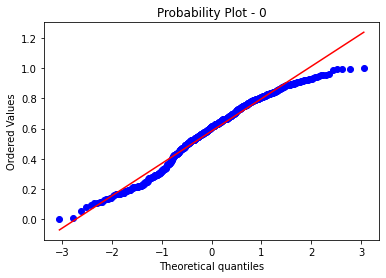

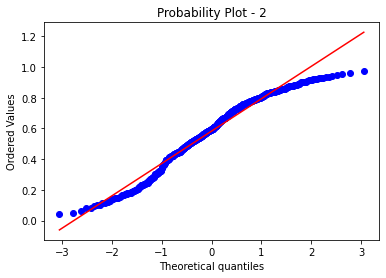

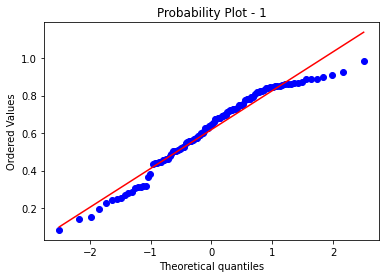

Score    1.037354
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.128132,2,0.064066,1.38932,0.249606,3.699138
Within Groups,61.284361,1329,0.046113,,,
Total,61.412493,1331,0.04614,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3893203236677028  and p value is: 0.24960640882237084
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.3893203236677028  and critical value is: 3.6991375784749216
Failed to reject the null hypothesis.


In [8]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/spic_VAE_max_scores.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

## Mal - VAE

In [2]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Downloads/max_scores-2.csv')
score_df = score_df[['Score','Agreement']]
score_df

,Score,Agreement
0,0.000000,Low Radiologist Agreement
1,0.085661,Low Radiologist Agreement
2,0.819978,Low Radiologist Agreement
3,0.255190,Low Radiologist Agreement
4,0.676898,Low Radiologist Agreement
...,...,...
1327,0.662809,Low Radiologist Agreement
1328,0.586354,High Radiologist Agreement
1329,0.272031,High Radiologist Agreement
1330,0.624689,Low Radiologist Agreement


In [3]:
groups = score_df.groupby('Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,Agreement,Score
0,All Radiologists Agree,99
1,High Radiologist Agreement,332
2,Low Radiologist Agreement,747
3,No Radiologist Agreement,154


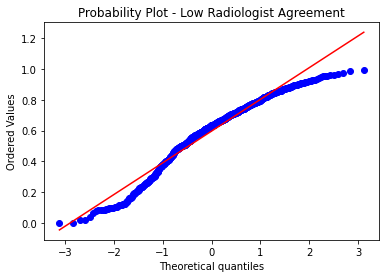

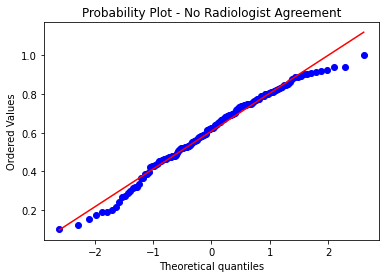

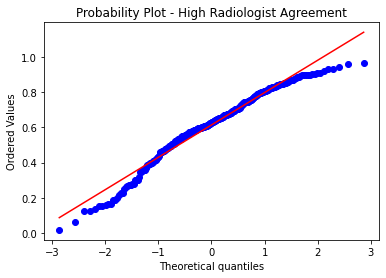

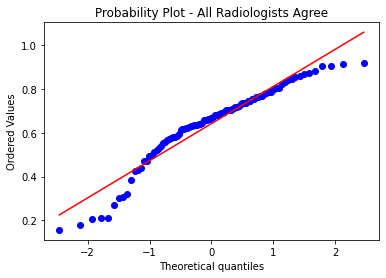

In [4]:
unique_majors = score_df['Agreement'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Agreement'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [5]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Agreement').count() * (score_df.groupby('Agreement').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Agreement').count() - 1) * score_df.groupby('Agreement').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Agreement'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Agreement'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.207874,3,0.069291,1.733421,0.158262,3.125948
Within Groups,53.085044,1328,0.039974,,,
Total,53.292917,1331,0.04004,,,


In [6]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.733420994210373  and p value is: 0.15826176749641108
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.733420994210373  and critical value is: 3.125948246710743
Failed to reject the null hypothesis.


## Mal-Labels

         Score  Spiculation
0     0.000000            3
1     0.085661            3
2     0.819978            3
3     0.255190            3
4     0.676898            3
...        ...          ...
1327  0.662809            3
1328  0.586354            2
1329  0.272031            2
1330  0.624689            3
1331  0.627993            2

[1332 rows x 2 columns]
   Spiculation  Score
0            0    171
1            1     79
2            2    181
3            3    901


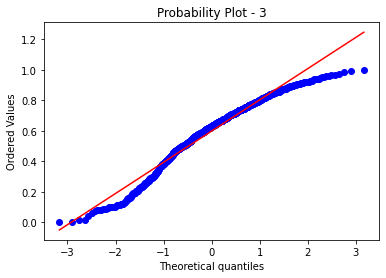

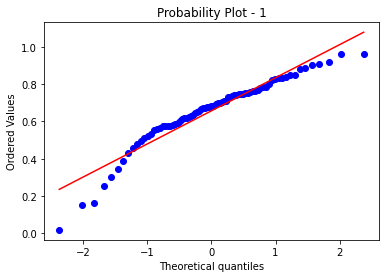

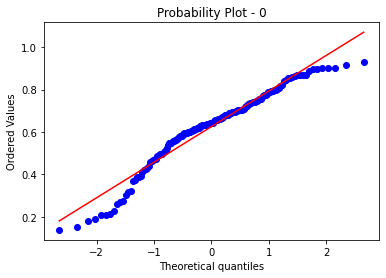

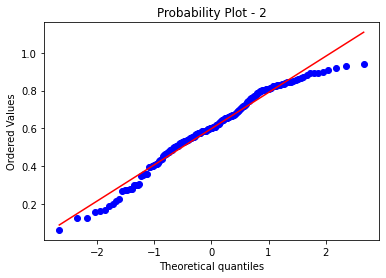

Score    1.217635
dtype: float64


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.328511,3,0.109504,2.745632,0.04178,3.125948
Within Groups,52.964406,1328,0.039883,,,
Total,53.292917,1331,0.04004,,,


Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 2.745631790895339  and p value is: 0.04177968577636193
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2.745631790895339  and critical value is: 3.125948246710743
Failed to reject the null hypothesis.


In [7]:
# read original dataset
score_df = pd.read_csv('/Users/amalalmansour/Downloads/max_scores-2.csv')
score_df = score_df[['Score','Spiculation']]
print(score_df)
groups = score_df.groupby('Spiculation').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
print(groups)
unique_majors = score_df['Spiculation'].unique()
for major in unique_majors:
    stats.probplot(score_df[score_df['Spiculation'] == major]['Score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()
# calculate ratio of the largest to the smallest sample standard deviation
ratio = score_df.groupby('Spiculation').std().max() / score_df.groupby('Spiculation').std().min()
print(ratio)
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = score_df['Score'].mean()
SSTR = score_df.groupby('Spiculation').count() * (score_df.groupby('Spiculation').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Score'].sum()

# calculate SSE and update anova table
SSE = (score_df.groupby('Spiculation').count() - 1) * score_df.groupby('Spiculation').std()**2
anova_table['SS']['Within Groups'] = SSE['Score'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Score'].sum() + SSE['Score'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = score_df['Spiculation'].nunique() - 1
anova_table['df']['Within Groups'] = score_df.shape[0] - score_df['Spiculation'].nunique()
anova_table['df']['Total'] = score_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
display(anova_table)

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

In [16]:
## Just checking!!
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=score_df['Score'], groups=score_df['Spiculation'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0118    0.9 -0.0619 0.0856  False
     0      2  -0.0407 0.2688 -0.0985 0.0171  False
     0      3  -0.0255 0.4703 -0.0707 0.0198  False
     1      2  -0.0525 0.2514 -0.1256 0.0206  False
     1      3  -0.0373 0.4346 -0.1009 0.0263  False
     2      3   0.0152 0.7872 -0.0289 0.0594  False
---------------------------------------------------
